In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")

## Multilingual

In [2]:
name_mapping = {
    'MetaMath-Mistral-7B.csv': 'Math',
    'GEITje-7B-ultra.csv': 'NL',
    'phenotype_0.csv': 'MERG$E^3$',
    'old_phenotype_0.csv': 'MERG$E^3$',
    'Arithmo2-Mistral-7B.csv': 'Math (2)',
    'em_german_mistral_v01.csv': 'DE',
    'phenotype_0_german_ties.csv': 'MERG$E^3$',
    'Abel-7B-002.csv': 'Math (3)', # TODO
    'Mistral-7B-v0.1.csv': None,  # TODO
    'Mistral-Ita-7b.csv': 'IT',
    'RoMistral-7b-Instruct.csv': 'RO',
}

In [3]:
# ----------------------------------------------------------------------
# Read data for each language
# ------------------------------------------------------------------------
# Example file names; adjust as needed
df = pd.read_csv("data/multilingual.csv")    # 'bin', 'accuracy'

In [4]:
# rename 
df['bin'] = df['bin'].map(name_mapping)

df.dropna(inplace=True)

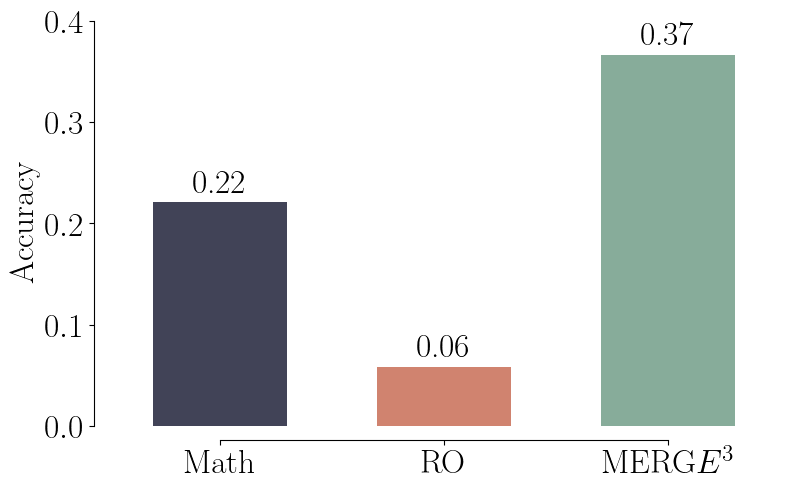

In [5]:

colors = {
    'MERG$E^3$': color_dict["Cambridge blue"],
    'Math': color_dict["Delft Blue"],
    'Math (2)': color_dict["Delft Blue"],
    'Math (3)': color_dict["Delft Blue"],
    'DE': color_dict["Burnt sienna"],
    'IT': color_dict["Burnt sienna"],
    'RO': color_dict["Burnt sienna"],
    'NL': color_dict["Burnt sienna"],
    'EN': color_dict["Burnt sienna"],
}
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(
    data=df,
    y="accuracy",
    x="bin",
    hue="bin",
    palette=colors,
    width=0.6,  # narrower bars
    ax=ax
)

# Give some extra headroom for the labels
max_val = df['accuracy'].max()
ax.set_ylim(top=max_val * 1.1)

# Put numeric labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.2f}",
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3),     # offset label slightly above the bar
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=24        # <-- Larger font for bar labels
        )

# Make tick-label fonts larger
ax.tick_params(axis='both', labelsize=24)  # <-- Larger tick labels

# Increase label/title font sizes
plt.xlabel("", fontsize=24)   # <-- Larger x-axis label
plt.ylabel("Accuracy", fontsize=24)  # <-- Larger y-axis label

# Optional: remove the top/right spines
sns.despine(offset=10, trim=True)

plt.tight_layout()

plt.savefig(f"figures/multilingual.pdf", bbox_inches='tight')
plt.show()


In [6]:
df = pd.read_csv('data/arc_multilingual_accuracies.csv')

df.rename(columns={df.columns[0]: 'Model'}, inplace=True)
df.set_index('Model', inplace=True)

print(df)

data = df.copy().reset_index()

# set NaN values to 0
data.fillna(0, inplace=True)

# Rename the first column for easier reference
data.rename(columns={data.columns[0]: "Model"}, inplace=True)

# Print the data
print(data)

# Identify "genotype1" accuracies
genotype_accuracies = data[data["Model"] == "genotype1"].iloc[0, 1:]

# Determine the best-performing model for each language (excluding genotype1)
best_models = data.set_index("Model").drop("genotype1").idxmax()
best_accuracies = data.set_index("Model").drop("genotype1").max()

# Prepare data for plotting
languages = genotype_accuracies.index
genotype_values = genotype_accuracies.values
best_values = best_accuracies.values

                           italian   english    german     dutch
Model                                                           
Mistral-7B-v0.1           0.408703  0.417235  0.422355  0.383959
GEITje-7B-ultra           0.316553  0.471843  0.366894  0.441980
leo-mistral-hessianai-7b  0.285836  0.309727  0.338737  0.297782
Mistral-Ita-7b            0.610922  0.726109  0.501706  0.615188
genotype1                 0.664676  0.786689  0.697099  0.638225
                      Model   italian   english    german     dutch
0           Mistral-7B-v0.1  0.408703  0.417235  0.422355  0.383959
1           GEITje-7B-ultra  0.316553  0.471843  0.366894  0.441980
2  leo-mistral-hessianai-7b  0.285836  0.309727  0.338737  0.297782
3            Mistral-Ita-7b  0.610922  0.726109  0.501706  0.615188
4                 genotype1  0.664676  0.786689  0.697099  0.638225


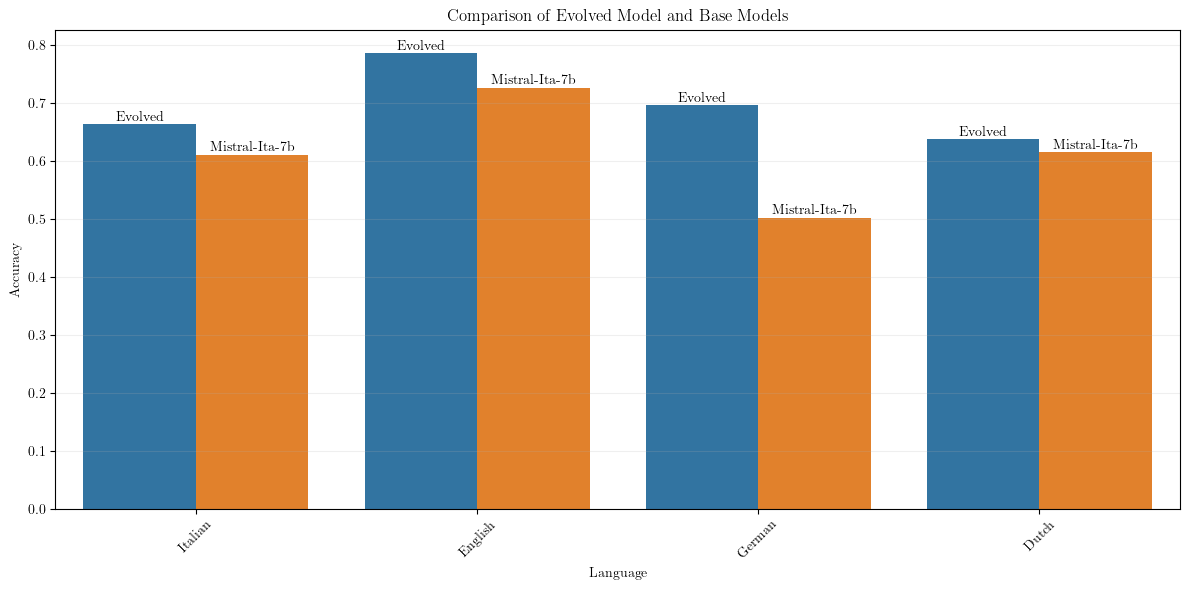

In [7]:
# retrieve name of best model for each language
best_models_ = best_models.to_dict()

# map language to model name
best_models_lang = {lang: best_models_[lang] for lang in languages}

import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for seaborn
plot_data = pd.DataFrame({
    "Language": list(languages) * 2,
    "Accuracy": list(genotype_values) + list(best_values),
    "Model": ["Evolved"] * len(languages) + ["Best Model"] * len(languages)
})

# capitalize the language names
plot_data["Language"] = plot_data["Language"].str.capitalize()

# Create the seaborn bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=plot_data, x="Language", y="Accuracy", hue="Model")

# Retrieve the name of the best model for each language
best_models_ = best_models.to_dict()
best_models_lang = {lang: best_models_[lang] for lang in languages}

# Add the text above each bar
for bar, label in zip(barplot.patches, ["Evolved"] * len(languages) + list(best_models_lang.values())):
    x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    y = bar.get_height() + 0.0  # Slightly above the bar
    plt.text(x, y, label, ha='center', va='bottom')

# disable the legend
barplot.get_legend().remove()

# add horizontal gridlines with transparency
plt.grid(axis='y', alpha=0.2)

# Add labels and title
plt.title("Comparison of Evolved Model and Base Models")
plt.ylabel("Accuracy")
plt.xlabel("Language")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

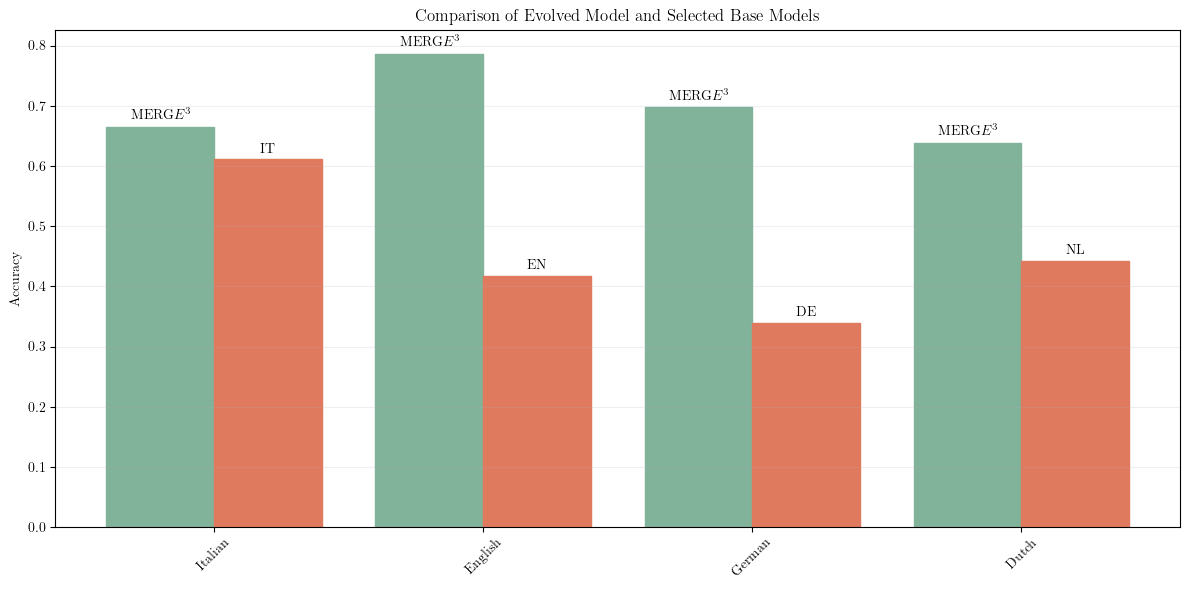

In [ ]:
# Reset and preprocess data
data = df.copy().reset_index()
data.fillna(0, inplace=True)
data.rename(columns={data.columns[0]: "Model"}, inplace=True)

# Identify "genotype1" accuracies
genotype_accuracies = data[data["Model"] == "genotype1"].iloc[0, 1:]

# Use specified base models for comparison
selected_models = {
    "italian": "Mistral-Ita-7b",
    "english": "Mistral-7B-v0.1",
    "german": "leo-mistral-hessianai-7b",
    "dutch": "GEITje-7B-ultra"
}

# Extract accuracies for the specified models
selected_accuracies = {lang: df.loc[model, lang] for lang, model in selected_models.items()}

# Rename selected models using the mapping
name_mapping = {
    'MetaMath-Mistral-7B': 'Math',
    'GEITje-7B-ultra': 'NL',
    'phenotype_0': 'MERG$E^3$',
    'old_phenotype_0': 'MERG$E^3$',
    'Arithmo2-Mistral-7B': 'Math (2)',
    'em_german_mistral_v01': 'DE',
    'phenotype_0_german_ties': 'MERG$E^3$',
    'Abel-7B-002': 'Math (3)',
    'Mistral-7B-v0.1': 'EN',
    'Mistral-Ita-7b': 'IT',
    'RoMistral-7b-Instruct': 'RO',
    'leo-mistral-hessianai-7b': 'DE',
    'Evolved': 'MERG$E^3$'
}

# Prepare data
languages = list(genotype_accuracies.index)
genotype_values = genotype_accuracies.values
selected_values = list(selected_accuracies.values())

# Map the selected models to their new names
selected_models_renamed = [name_mapping.get(model, model) for model in selected_models.values()]

# Set up the bar positions
x = np.arange(len(languages))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars side by side
rects1 = ax.bar(x - width/2, genotype_values, width, label='MERG$E^3$')
rects2 = ax.bar(x + width/2, selected_values, width, label='Base Model')

# Add labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evolved Model and Base Models')
ax.set_xticks(x)
ax.set_xticklabels([lang.capitalize() for lang in languages], rotation=45)

# Add gridlines
ax.grid(axis='y', alpha=0.2)

# Add legend
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Function to add labels above each bar
def autolabel(rects, labels):
    """Attach a text label above each bar displaying the model name."""
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.annotate('{}'.format(label),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        # give the bar a color according to colors
        rect.set_color(colors[label])

# Add labels above the bars
autolabel(rects1, ['MERG$E^3$'] * len(languages))
autolabel(rects2, selected_models_renamed)

# remove legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()


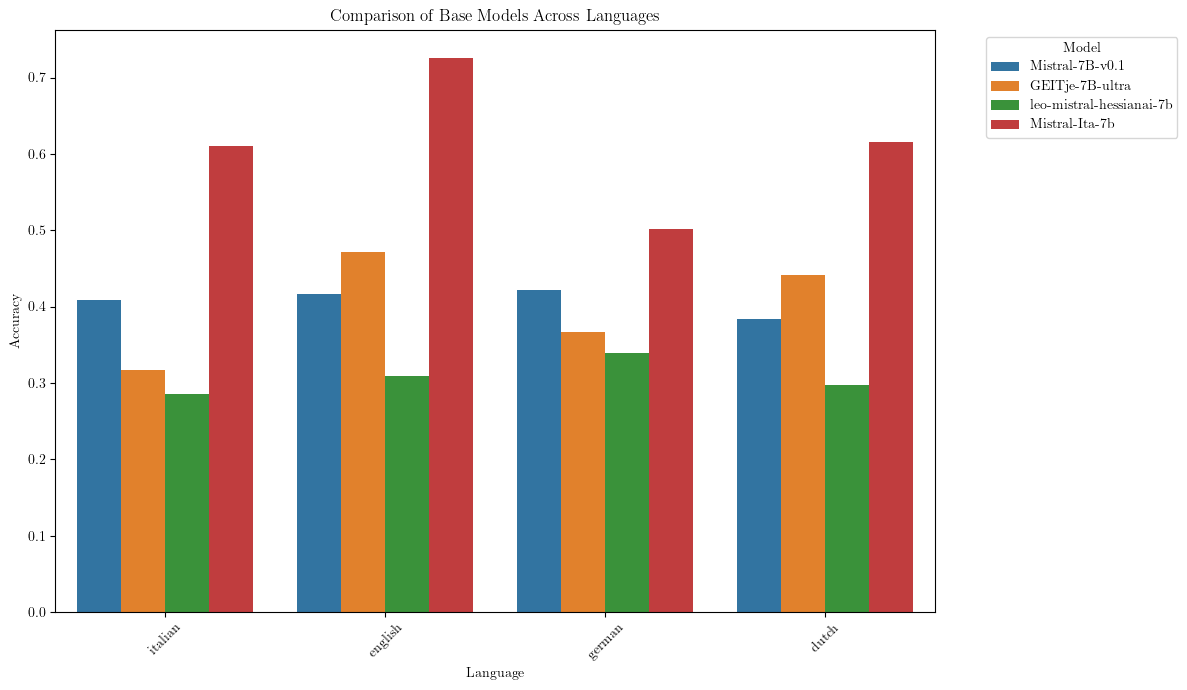

In [9]:
# Filter out genotype1
filtered_data = data[data["Model"] != "genotype1"]

# Reshape data for Seaborn
melted_data = filtered_data.melt(id_vars=["Model"], var_name="Language", value_name="Accuracy")
melted_data.dropna(subset=["Accuracy"], inplace=True)  # Drop missing values

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=melted_data, x="Language", y="Accuracy", hue="Model")

# Add labels and title
plt.title("Comparison of Base Models Across Languages")
plt.ylabel("Accuracy")
plt.xlabel("Language")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

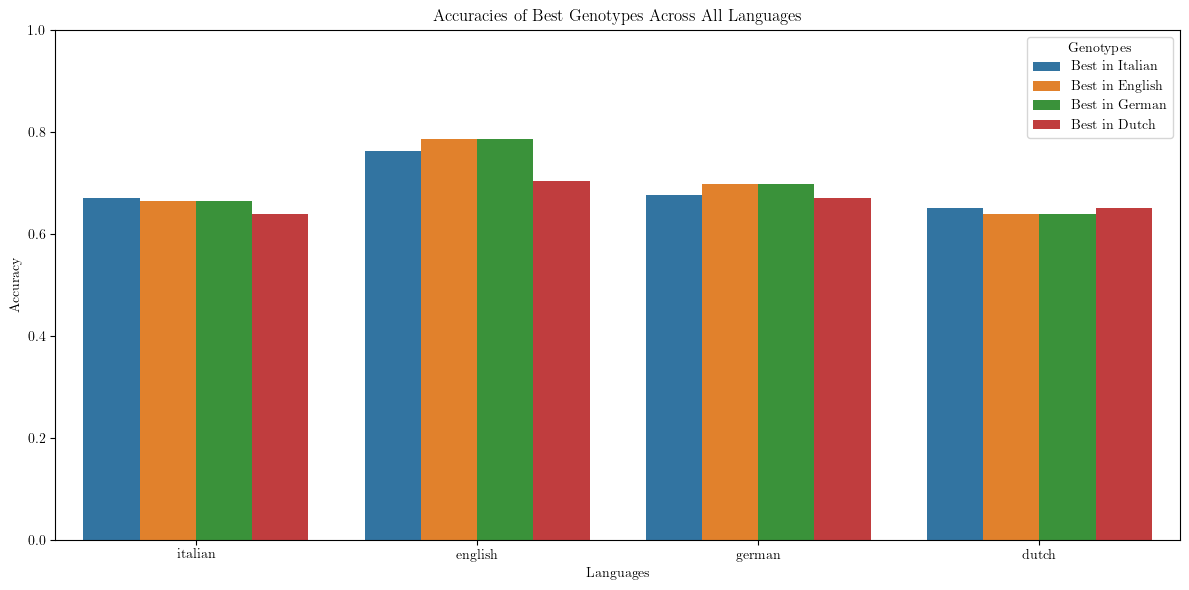

In [10]:
# Load the dataset
file_path = 'data/arc_genotype_accuracies.csv'
genotype_data = pd.read_csv(file_path)

# Identify the best genotype for each language
languages = ['italian', 'english', 'german', 'dutch']
best_genotypes = {language: genotype_data.loc[genotype_data[language].idxmax()] for language in languages}

# Create a DataFrame for the best genotypes
best_genotypes_data = pd.DataFrame([best_genotypes[lang] for lang in languages])

# Rename the indices to match languages
best_genotypes_data.index = languages

# Extract accuracies of the best genotypes across all languages
accuracies = best_genotypes_data[languages]

# Transpose the accuracies DataFrame for plotting
accuracies = accuracies.transpose()
accuracies.columns = [f"Best in {col.capitalize()}" for col in accuracies.columns]

# Prepare the data for seaborn
melted_accuracies = accuracies.reset_index().melt(id_vars="index", var_name="Genotype", value_name="Accuracy")
melted_accuracies.rename(columns={"index": "Language"}, inplace=True)

# Plot the accuracies using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_accuracies, x="Language", y="Accuracy", hue="Genotype")

# Formatting the plot
plt.title("Accuracies of Best Genotypes Across All Languages")
plt.xlabel("Languages")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend(title="Genotypes")
plt.tight_layout()
plt.show()
